#### For this assignment, you will build 6 models. You need to train Logistic Regression/Regularized Logistic Regression each with Batch Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent. Also you should plot their objective values versus epochs and compare their training and testing accuracies. You will need to tune the parameters a little bit to obtain reasonable results.

#### You do not have to follow the following procedure. You may implement your own functions and methods, but you need to show your results and plots.

In [1]:
# Load Packages
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold


# 1. Data processing

- Download the Breast Cancer dataset from canvas or from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
- Load the data.
- Preprocess the data.

## 1.1. Load the data

In [2]:
df = pd.read_csv("data.csv")

## 1.2 Examine and clean data

In [3]:
# Some columns may not be useful for the model (For example, the first column contains ID number which may be irrelavant). 
# You need to get rid of the ID number feature.
# Also you should transform target labels in the second column from 'B' and 'M' to 1 and -1.

In [4]:
df.shape

(569, 33)

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
df = df.drop("Unnamed: 32",axis =1 )
df = df.drop("id", axis = 1)

In [8]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
df.isna().any().sum()

0

In [10]:
le = preprocessing.LabelEncoder()
le.fit(df.diagnosis)
le.classes_ = le.classes_[::-1]
df.diagnosis = le.transform(df.diagnosis)
df.diagnosis = df["diagnosis"].replace(0, -1)

In [11]:
df["diagnosis"].unique()

array([-1,  1])

In [12]:
df.shape

(569, 31)

In [13]:
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,-1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,-1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,-1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,-1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,1,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


## 1.3. Partition to training and testing sets

In [14]:
X = df.drop("diagnosis", axis = 1)
Y = df["diagnosis"]

In [15]:
# You can partition using 80% training data and 20% testing data. It is a commonly used ratio in machinel learning.
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,1:31], df.diagnosis, train_size=0.8, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(455, 30) (455,) (114, 30) (114,)


## 1.4. Feature scaling

Use the standardization to trainsform both training and test features

In [16]:
# calculate mu and sig using the training set
d = x_train.shape[1]
mu = np.mean(x_train, axis=0).values.reshape(1,d)
sig = np.std(x_train, axis=0).values.reshape(1,d)

# transform the training features
x_train = (x_train - mu) / (sig + 1E-6)

# transform the test features
x_test = (x_test - mu) / (sig + 1E-6)

print('test mean = ')
print(np.mean(x_test, axis=0))

print('test std = ')
print(np.std(x_test, axis=0))

test mean = 
radius_mean                0.013646
texture_mean               0.122535
perimeter_mean             0.017830
area_mean                  0.007201
smoothness_mean            0.221149
compactness_mean           0.068722
concavity_mean            -0.006214
concave points_mean        0.083925
symmetry_mean              0.011485
fractal_dimension_mean     0.028301
radius_se                  0.055695
texture_se                 0.130663
perimeter_se               0.018831
area_se                    0.028115
smoothness_se              0.084815
compactness_se            -0.042242
concavity_se              -0.144548
concave points_se         -0.077631
symmetry_se               -0.019083
fractal_dimension_se      -0.045792
radius_worst               0.035400
texture_worst              0.116600
perimeter_worst            0.023669
area_worst                 0.031653
smoothness_worst           0.181063
compactness_worst          0.049100
concavity_worst           -0.057414
concave points_

In [17]:
x_train.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,-1.440753,-0.435319,-1.362085,-1.139118,0.780517,0.718908,2.823099,-0.119146,1.092622,2.457831,...,-1.232861,-0.476309,-1.247920,-0.973968,0.722863,1.186725,4.672806,0.931998,2.097209,1.886344
181,1.974096,1.733025,2.091672,1.851973,1.319748,3.426210,2.013087,2.664962,2.126926,1.558179,...,2.173313,1.311279,2.081617,2.137405,0.761895,3.265580,1.928611,2.698906,1.891131,2.497698
63,-1.399982,-1.249622,-1.345209,-1.109785,-1.332549,-0.307349,-0.365553,-0.696484,1.930263,0.954246,...,-1.295283,-1.040811,-1.245220,-0.999715,-1.438631,-0.548561,-0.644908,-0.970224,0.597592,0.057891
248,-0.981797,1.416222,-0.982587,-0.866944,0.059386,-0.596776,-0.820193,-0.845092,0.313253,0.074031,...,-0.829197,1.593530,-0.873572,-0.742947,0.796590,-0.729387,-0.774946,-0.809471,0.798915,-0.134489
60,-1.117700,-1.010259,-1.125002,-0.965942,1.269420,-0.438993,-0.983329,-0.930575,3.394312,0.950081,...,-1.085128,-1.334616,-1.117138,-0.896549,-0.174868,-0.995072,-1.209141,-1.354561,1.033527,-0.205720
15,0.119585,1.960655,0.199535,0.012473,1.305369,1.066144,0.944828,0.667032,1.791870,1.112518,...,0.254869,1.913745,0.509835,0.116768,1.572889,2.615251,2.046220,0.873765,2.081357,2.817397
290,0.082778,0.127887,0.170723,-0.009526,-0.587691,1.220684,0.595880,0.466608,-0.353218,1.272179,...,-0.096776,-0.562140,-0.162071,-0.193435,-1.374879,-0.035789,-0.251446,-0.185153,-1.003478,0.231201
137,-0.760954,-0.890578,-0.774728,-0.718024,0.046444,-0.662599,-0.678598,-0.513682,-0.280379,-0.570164,...,-0.814632,-0.580297,-0.815080,-0.731837,-0.543502,-0.567935,-0.643951,-0.450879,-0.363050,-0.909619
155,-0.528786,-0.292171,-0.560283,-0.547387,-0.661746,-0.702664,-0.630476,-0.656767,0.579112,-0.066192,...,-0.550378,-0.052108,-0.615008,-0.551605,-0.426406,-0.477522,-0.383874,-0.491489,0.329691,-0.142902
517,1.634338,0.252262,1.589517,1.578389,0.572015,0.522394,0.657607,1.210703,-0.032729,-0.121726,...,1.559495,-0.050457,1.601684,1.356167,0.440967,0.504752,0.687987,0.722053,-0.564373,0.420216


In [18]:
y_train.head(10)

68     1
181   -1
63     1
248    1
60     1
15    -1
290    1
137    1
155    1
517   -1
Name: diagnosis, dtype: int64

In [19]:
x_test.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,-0.466497,-0.137289,-0.444211,-0.486465,0.280830,0.041605,-0.111464,-0.264862,0.415226,0.135119,...,-0.263235,-0.147842,-0.331548,-0.351093,0.479999,-0.096495,-0.035830,-0.194348,0.172754,0.203719
70,1.365363,0.498665,1.305511,1.341471,-0.406510,-0.013724,0.240634,0.821427,-0.833950,-1.131058,...,1.794618,0.172372,1.763661,1.744141,-0.530491,-0.123619,-0.028181,0.991763,-0.561202,-1.008333
131,0.380066,0.069220,0.404101,0.266596,0.967451,0.356408,0.726893,0.857198,0.437078,-0.665960,...,0.629403,0.076638,0.533832,0.492044,1.000423,-0.086162,0.499622,0.570341,-0.107830,-0.206281
431,-0.486317,-0.353185,-0.428570,-0.526233,0.694240,0.533842,-0.144721,-0.533672,0.000048,1.147227,...,-0.698110,-0.433394,-0.524721,-0.636959,0.584083,0.065602,-0.163956,-0.620367,-0.553276,0.545292
540,-0.729810,-1.113514,-0.709283,-0.709281,0.294490,0.159895,-0.271198,-0.587592,0.025541,0.702955,...,-0.827116,-0.966535,-0.849575,-0.739243,0.128712,-0.264405,-0.453674,-0.689634,-0.913121,-0.141781
567,1.835361,2.380713,1.984655,1.722232,1.585769,3.307920,3.306839,2.728088,2.134210,1.027829,...,1.977724,2.291730,2.324583,1.664783,1.451457,3.974031,3.174973,2.311197,1.873693,2.250913
369,2.234577,0.637120,2.276893,2.334270,0.758948,1.751078,1.963957,2.678113,0.047393,-0.188367,...,2.377226,0.043626,2.636540,2.380771,-0.092468,0.876737,0.960972,1.977125,-0.260011,0.105004
29,0.977473,-0.970365,0.951533,0.848174,0.195991,0.230487,0.124108,0.821953,-0.262170,-0.175872,...,0.785459,-0.992944,0.833790,0.617254,-0.261605,0.183785,-0.122841,0.481460,-0.236232,-0.262369
81,-0.220173,-0.780283,-0.221946,-0.379006,0.866794,0.951671,0.352750,0.567872,0.477139,0.869557,...,-0.146714,-0.387178,-0.313250,-0.462195,0.957054,1.461839,1.009736,0.867635,0.985971,0.994553
477,-0.061619,-0.601935,-0.119869,-0.155062,-1.974593,-0.962138,-0.839719,-0.917687,0.007332,-1.026932,...,-0.227863,-0.616610,-0.177069,-0.278789,-1.634657,-0.336736,-0.651123,-0.796292,-0.358294,-0.386322


In [20]:
y_test.head(5)

204    1
70    -1
131   -1
431    1
540    1
Name: diagnosis, dtype: int64

# 2.  Logistic Regression Model

The objective function is $Q (w; X, y) = \frac{1}{n} \sum_{i=1}^n \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

When $\lambda = 0$, the model is a regular logistric regression and when $\lambda > 0$, it essentially becomes a regularized logistric regression.

In [21]:
# Calculate the objective function value, or loss
# Inputs:
#     w: weight: d-by-1 vector
#     x: data: n-by-d matrix
#     y: label: n-by-1 vector
#     lam: regularization parameter: scalar
# Return:
#     objective function value, or loss (scalar)
def objective(w, x, y, lam):
    n = len(y)
    obj = 0
    for i in range(n):
        obj += np.log(1 + np.exp(-y[i] * np.dot(x[i], w)))
    obj = obj/n
    obj += (lam/2) * (np.linalg.norm(w)**2)
    return obj

# 3. Numerical optimization

## 3.1. Gradient descent


The gradient at $w$ for regularized logistic regression is  $g = - \frac{1}{n} \sum_{i=1}^n \frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$

In [22]:
# Calculate the gradient
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     g: gradient: d-by-1 matrix

def gradient(w, x, y, lam):
    n = len(y)
    g = np.zeros_like(w)
    for i in range(n):
        e = np.exp(y[i] * np.dot(x[i].T, w))
        g += (-y[i] * x[i])/(1 + e)
    g = g/n
    g += lam*w
    return g

In [23]:
# Gradient descent for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 vector, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 vector, the solution
#     objvals: a record of each epoch's objective value

def gradient_descent(x, y, lam, learning_rate, w, max_epoch=1000):
    objvals = []
    for i in range(max_epoch):
        obj = objective(w,x,y,lam)
        g = gradient(w,x,y,lam)
        w = w - learning_rate*g
        objvals.append(obj)
    
    return w, objvals

Use gradient_descent function to obtain your optimal weights and a list of objective values over each epoch.

In [24]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w = np.zeros(x_train.shape[1])
w_optimal, objvals = gradient_descent(x_train.values, y_train.values, 0, 0.002, w, 1000)

In [25]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w = np.zeros(x_train.shape[1])
w_optimal_reg, objvals_reg = gradient_descent(x_train.values, y_train.values, 0.6, 0.002, w, 1000)

## 3.2. Stochastic gradient descent (SGD)

Define new objective function $Q_i (w) = \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $. 

The stochastic gradient at $w$ is $g_i = \frac{\partial Q_i }{ \partial w} = -\frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [26]:
# Calculate the objective Q_i and the gradient of Q_i
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: 1-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def stochastic_objective_gradient(w, xi, yi, lam):
    qi = (np.log(1 + np.exp(-yi * np.dot(xi.T, w)))) + (lam/2) * np.linalg.norm(w)**2
    
    gi = ((-yi*xi)/(1 + np.exp(yi * np.dot(xi.T, w)))) + lam*w

    return qi, gi

Hints:
1. In every epoch, randomly permute the $n$ samples.
2. Each epoch has $n$ iterations. In every iteration, use 1 sample, and compute the gradient and objective using the ``stochastic_objective_gradient`` function. In the next iteration, use the next sample, and so on.

In [27]:
# SGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def sgd(x, y, lam, learning_rate, w, max_epoch=1000):
    objvals  = []
    n = len(y)
    for j in range(max_epoch):
        random_idx = np.random.permutation(n)
        Qi = 0 
        for i in random_idx:
            qi, gi = stochastic_objective_gradient(w, x[i], y[i], lam)
            w = w - learning_rate*gi
            Qi += qi
        objvals.append(Qi/(len(y)))
    
    return w, objvals

Use sgd function to obtain your optimal weights and a list of objective values over each epoch.

In [28]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w = np.zeros(x_train.shape[1])
w_optimal_sgd, objvals_sgd = sgd(x_train.values, y_train.values, 0, 0.002, w, 1000)

In [29]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w = np.zeros(x_train.shape[1])
w_optimal_reg_sgd, objvals_sgd_reg = sgd(x_train.values, y_train.values, 0.6, 0.002,w, 1000)

## 3.3 Mini-Batch Gradient Descent (MBGD)

Define $Q_I (w) = \frac{1}{b} \sum_{i \in I} \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $, where $I$ is a set containing $b$ indices randomly drawn from $\{ 1, \cdots , n \}$ without replacement.

The stochastic gradient at $w$ is $g_I = \frac{\partial Q_I }{ \partial w} = \frac{1}{b} \sum_{i \in I} \frac{- y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [30]:
# Calculate the objective Q_I and the gradient of Q_I
# Inputs:
#     w: weights: d-by-b matrix
#     xi: data: b-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def mb_objective_gradient(w, xi, yi, lam):
    b = len(yi)
    qi = 0 
    for i in range(b):
        qi += np.log(1 + np.exp(-yi[i] * np.dot(xi[i].T,w)))
        
    qi /= b
    qi += (lam/2)* np.linalg.norm(w)**2
    
    gi = np.zeros_like(w)
    for i in range(b):
        gi += (-yi[i]*xi[i]) / (1 + np.exp(yi[i] * np.dot(xi[i].T,w)))
    gi /= b
    gi += lam*w
    
    return qi,gi

Hints:
1. In every epoch, randomly permute the $n$ samples (just like SGD).
2. Each epoch has $\frac{n}{b}$ iterations. In every iteration, use $b$ samples, and compute the gradient and objective using the ``mb_objective_gradient`` function. In the next iteration, use the next $b$ samples, and so on.

In [31]:
# MBGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def mbgd(x, y, lam, learning_rate, w, max_epoch=1000):
    b_size = 40
    objvals = []
    n = len(y)
    
    batches = n//b_size
    
    for epoch in range(max_epoch):
        random_idx = np.random.permutation(n)
        total_obj = 0
        
        for batch in range(batches):
            #slicing the indices over the shuffled data points
            batch_idx = random_idx[batch * b_size : (batch + 1) * b_size]
            xi_b = x[batch_idx]
            yi_b = y[batch_idx]
            
            obj, grad = mb_objective_gradient(w, xi_b, yi_b, lam)
            w = w - learning_rate * grad
            total_obj += obj
        
        # Compute average objective value per epoch
        avg_obj = total_obj / batches
        objvals.append(avg_obj)
    
    return w, objvals

Use mbgd function to obtain your optimal weights and a list of objective values over each epoch.

In [32]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w = np.zeros(x_train.shape[1])
w_optimal_mbgd, objvals_mbgd = mbgd(x_train.values, y_train.values, 0, 0.002, w, 1000)

In [33]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w = np.zeros(x_train.shape[1])
w_optimal_reg_mbgd, objvals_mbgd_reg = mbgd(x_train.values, y_train.values, 0.6, 0.002,w, 1000)

# 4. Compare GD, SGD, MBGD

### Plot objective function values against epochs.

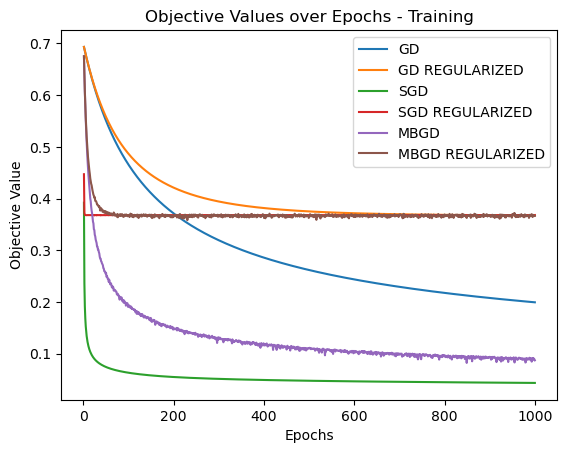

In [34]:
epochs = range(1,1001) 

# Plotting
plt.plot(epochs, objvals, label='GD')
plt.plot(epochs, objvals_reg, label='GD REGULARIZED')
plt.plot(epochs, objvals_sgd, label='SGD')
plt.plot(epochs, objvals_sgd_reg, label='SGD REGULARIZED')
plt.plot(epochs, objvals_mbgd, label='MBGD')
plt.plot(epochs, objvals_mbgd_reg, label='MBGD REGULARIZED')
plt.xlabel('Epochs')
plt.ylabel('Objective Value')
plt.title('Objective Values over Epochs - Training')
plt.legend()
plt.show()

# 5. Prediction
### Compare the training and testing accuracy for logistic regression and regularized logistic regression.

In [35]:
# Predict class label
# Inputs:
#     w: weights: d-bp-1 matrix
#     X: data: m-bp-d matrix
# Return:
#     f: m-bp-1 matrix, the predictions
def predict(w, X):
    p = (np.dot(X,w))
    for i in range(len(p)):
        p[i] = math.copysign(1, p[i])
    return p

In [36]:
def calculate_error(w, x, y):
    y_pred = predict(w,x)
    score = np.mean(y != y_pred)
    return score

In [37]:
# Assessing training error for standard and regularized logistic regression
print("Lambda - 0 (Standard)/0.6 (Regularized), Learning Rate = 0.002, Epochs = 1000\n")

# For Gradient Descent Models
print("Training Error - Standard GD Model: ", calculate_error(w_optimal, x_train, y_train.values)*100)
print("Training Error - Regularized GD Model: ", calculate_error(w_optimal_reg, x_train, y_train.values)*100, "\n")

# For Stochastic Gradient Descent Models
print("Training Error - Standard SGD Model: ", calculate_error(w_optimal_sgd, x_train, y_train.values)*100)
print("Training Error - Regularized SGD Model: ", calculate_error(w_optimal_reg_sgd, x_train, y_train.values)*100, "\n")

# For Mini-Batch Gradient Descent Models
print("Training Error - Standard MBGD Model: ", calculate_error(w_optimal_mbgd, x_train, y_train.values)*100)
print("Training Error - Regularized MBGD Model: ", calculate_error(w_optimal_reg_mbgd, x_train, y_train.values)*100, "\n")


Lambda - 0 (Standard)/0.6 (Regularized), Learning Rate = 0.002, Epochs = 1000

Training Error - Standard GD Model:  3.7362637362637363
Training Error - Regularized GD Model:  4.395604395604396 

Training Error - Standard SGD Model:  0.8791208791208791
Training Error - Regularized SGD Model:  4.175824175824175 

Training Error - Standard MBGD Model:  1.9780219780219779
Training Error - Regularized MBGD Model:  3.9560439560439558 



In [38]:
# evaluate testing  of logistric regression and regularized version
print("Lambda - 0 (Standard)/0.6 (Regularized), Learning Rate = 0.002, Epochs = 1000\n")
print("Testing error - Standard GD Model: ", calculate_error(w_optimal, x_test, y_test.values)*100)
print("Testing error  : Regularized GD Model:", calculate_error(w_optimal_reg, x_test, y_test.values)*100, "\n")

print("Testing error : Standard SGD Model:", calculate_error(w_optimal_sgd, x_test, y_test.values)*100)
print("Testing error  : Regularized SGD Model:", calculate_error(w_optimal_reg_sgd, x_test, y_test.values)*100, "\n")

print("Testing error  :Standard MBGD Model:", calculate_error(w_optimal_mbgd, x_test, y_test.values)*100)
print("Testing error  : Regularized MBGD Model:", calculate_error(w_optimal_reg_mbgd, x_test, y_test.values)*100, "\n")

Lambda - 0 (Standard)/0.6 (Regularized), Learning Rate = 0.002, Epochs = 1000

Testing error - Standard GD Model:  2.631578947368421
Testing error  : Regularized GD Model: 2.631578947368421 

Testing error : Standard SGD Model: 1.7543859649122806
Testing error  : Regularized SGD Model: 2.631578947368421 

Testing error  :Standard MBGD Model: 2.631578947368421
Testing error  : Regularized MBGD Model: 2.631578947368421 



# 6. Parameters tuning

### In this section, you may try different combinations of parameters (regularization value, learning rate, etc) to see their effects on the model. (Open ended question)

### FOR GD:

In [ ]:
# Function for k-fold cross-validation with GD
def gd_kfold_cross_validation(x, y, lam, learning_rate, k=5, max_epoch=1000):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    errors = []
    
    for train_index, _ in kf.split(x):
        x_train, y_train = x[train_index], y[train_index]
        
        w_optimal, _ = gradient_descent(x_train, y_train, lam, learning_rate, w, max_epoch)
        err = calculate_error(w_optimal, x_train, y_train)
        errors.append(err)
    
    return np.mean(errors)

# Hyperparameter tuning with k-fold cross-validation and GD using only training set
lambda_values = [0, 0.001,0.009, 0.1,0.2, 0.5,0.6]
learning_rate_values = [0.001,0.001, 0.1, 0.5]

best_error = float('inf')
best_lambda = None
best_learning_rate = None
best_weights = None

for lam in lambda_values:
    for learning_rate in learning_rate_values:
        avg_error = gd_kfold_cross_validation(x_train.values, y_train.values, lam, learning_rate)
        
        if avg_error < best_error:
            best_error = avg_error
            best_lambda = lam
            best_learning_rate = learning_rate

# Print optimal values and error
print('\nOptimal Values for GD:')
print('Best Lambda:', best_lambda)
print('Best Learning Rate:', best_learning_rate)
print('Optimal Error:', best_error*100)

### FOR SGD:

In [ ]:
def calculate_error(w, x, y):
    y_pred = predict(w, x)
    score = np.mean(y != y_pred)
    return score

# Function for k-fold cross-validation with SGD
def sgd_kfold_cross_validation(x, y, lam, learning_rate, k=5, max_epoch=1000):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    errors = []
    
    for train_index, _ in kf.split(x):
        x_train, y_train = x[train_index], y[train_index]
        
        w_optimal, _ = sgd(x_train, y_train, lam, learning_rate, w, max_epoch)
        err = calculate_error(w_optimal, x_train, y_train)
        errors.append(err)
    
    return np.mean(errors)

# Hyperparameter tuning with k-fold cross-validation and SGD 
lambda_values = [0, 0.001,0.002,0.005,0.009, 0.1,0.2, 0.5,0.6]
learning_rate_values = [0.001, 0.1,0.2, 0.5]

best_error = float('inf')
best_lambda = None
best_learning_rate = None
best_weights = None

for lam in lambda_values:
    for learning_rate in learning_rate_values:
        avg_error = sgd_kfold_cross_validation(x_train.values, y_train.values,lam, learning_rate)
        
        if avg_error < best_error:
            best_error = avg_error
            best_lambda = lam
            best_learning_rate = learning_rate

# Print optimal values and error
print('\nOptimal Values for SGD:')
print('Best Lambda:', best_lambda)
print('Best Learning Rate:', best_learning_rate)
print('Optimal Error:', best_error*100)

### FOR MBGD:

In [ ]:
# Function for k-fold cross-validation with MBGD
def mbgd_kfold_cross_validation(x, y, lam, learning_rate, k=5, max_epoch=1000):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    errors = []
    
    for train_index, _ in kf.split(x):
        x_train, y_train = x[train_index], y[train_index]
        
        w_optimal, _ = mbgd(x_train, y_train, lam, learning_rate, w, max_epoch)
        err = calculate_error(w_optimal, x_train, y_train)
        errors.append(err)
    
    return np.mean(errors)

lambda_values = [0, 0.001,0.002,0.005,0.009, 0.1,0.2, 0.5,0.6]
learning_rate_values = [0.001, 0.1,0.2, 0.5]

best_error = float('inf')
best_lambda = None
best_learning_rate = None
best_weights = None

for lam in lambda_values:
    for learning_rate in learning_rate_values:
        avg_error = mbgd_kfold_cross_validation(x_train.values, y_train.values, lam, learning_rate)
        
        if avg_error < best_error:
            best_error = avg_error
            best_lambda = lam
            best_learning_rate = learning_rate

# Print optimal values and error
print('\nOptimal Values:')
print('Best Lambda:', best_lambda)
print('Best Learning Rate:', best_learning_rate)
print('Optimal Error:', best_error*100)